<a href="https://colab.research.google.com/github/prathammehta16/Object_Detection_From_Scratch/blob/main/Object_Detection_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
#!unzip gdrive/MyDrive/raccoon_dataset.zip
#!unzip gdrive/MyDrive/out.zip

In [ ]:
import torch
import os

Base_Path = "raccoon_dataset"
Image_Path = os.path.sep.join([Base_Path, "images"])
Annots_Path = os.path.sep.join([Base_Path, "annotations"])

Base_Output = "out"

MODEL_PATH = os.path.sep.join([Base_Output, "detector.pth"])
LE_PATH = os.path.sep.join([Base_Output, "le.pickle"])
PLOTS_PATH = os.path.sep.join([Base_Output, "plots"])
Test_Paths = os.path.sep.join([Base_Output, "test_paths.txt"])
print(Image_Path)

raccoon_dataset/images


In [ ]:
#!pip uninstall opencv-python
#!pip install opencv-python

In [ ]:
import glob
import numpy as np
import cv2
mean_sum = np.array([0., 0., 0.])
std_sum = np.array([0., 0., 0.])
#n_images = len(img_names)
n_images = 200
for img_name in glob.iglob(Image_Path + '**/*.jpg', recursive=True):
  img = cv2.imread(img_name)
  #img = cv2.resize(img, size)
  #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  mean, std = cv2.meanStdDev(img)
  mean_sum += np.squeeze(mean)
  std_sum += np.squeeze(std)
mean_sum = mean_sum / n_images 
std_sum = std_sum / n_images
mean = mean_sum
std = std_sum 
mean = mean_sum 
std = std_sum
print(mean)
print(std)

[ 96.03286648 110.45692443 115.56742814]
[54.86726231 54.91089482 56.0211209 ]


In [ ]:
Device = "cuda" if torch.cuda.is_available() else "cpu"
Pin_Memory = True if Device == "cuda" else False

Init_Lr = 0.0005
#Init_Lr = 3e-4
#Num_Epochs = 30
Num_Epochs = 25
Batch_Size = 32
LABELS = 1
BBOX = 1

Mean = [96.03286648, 110.45692443, 115.56742814 ]
Std = [54.86726231, 54.91089482, 56.0211209]

In [ ]:
from torch.utils.data import Dataset

class Custom_Dataset(Dataset):

  def __init__(self, tensors, transforms=None):
    self.tensors = tensors
    self.transforms = transforms
  
  def __getitem__(self, index):
    image = self.tensors[0][index]
    label = self.tensors[1][index]
    bbox = self.tensors[2][index]

    image = image.permute(2,0,1)

    if self.transforms:
      image = self.transforms(image)

    return (image,label, bbox) 

  def __len__(self):
    return self.tensors[0].size(0) 

In [ ]:
"""
from torch.nn import Sequential
from torch.nn import Module  
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Dropout
from torch.nn import Identity
class ObjectDetection(Module):
  def __init__(self, BaseModel, NumClasses):
    super(ObjectDetection, self).__init__()
    self.BaseModel = BaseModel
    self.NumClasses = NumClasses

    self.Regressor = Sequential(
        Linear(BaseModel.fc.in_features, 64),
        ReLU(),
        Linear(64,32),
        ReLU(),
        Linear(32,4),
        Sigmoid()
    )

    self.Classifier = Sequential(
        Linear(BaseModel.fc.in_features, 256),
        ReLU(),
        Dropout(0.9),
        Linear(256, 256),
        ReLU(),
        Dropout(0.9),
        Linear(256, NumClasses)
    )

    self.BaseModel.fc = Identity()
  
  def forward(self, x):
    features = self.BaseModel(x)
    Bboxes = self.Regressor(features)
    Logits = self.Classifier(features)

    return (Bboxes, Logits)
"""

'\nfrom torch.nn import Sequential\nfrom torch.nn import Module  \nfrom torch.nn import Linear\nfrom torch.nn import ReLU\nfrom torch.nn import Sigmoid\nfrom torch.nn import Dropout\nfrom torch.nn import Identity\nclass ObjectDetection(Module):\n  def __init__(self, BaseModel, NumClasses):\n    super(ObjectDetection, self).__init__()\n    self.BaseModel = BaseModel\n    self.NumClasses = NumClasses\n\n    self.Regressor = Sequential(\n        Linear(BaseModel.fc.in_features, 64),\n        ReLU(),\n        Linear(64,32),\n        ReLU(),\n        Linear(32,4),\n        Sigmoid()\n    )\n\n    self.Classifier = Sequential(\n        Linear(BaseModel.fc.in_features, 256),\n        ReLU(),\n        Dropout(0.9),\n        Linear(256, 256),\n        ReLU(),\n        Dropout(0.9),\n        Linear(256, NumClasses)\n    )\n\n    self.BaseModel.fc = Identity()\n  \n  def forward(self, x):\n    features = self.BaseModel(x)\n    Bboxes = self.Regressor(features)\n    Logits = self.Classifier(featur

In [ ]:

from torch.nn import Sequential
from torch.nn import Module  
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Dropout
from torch.nn import Identity

class ObjectDetection(Module):
  def __init__(self, BaseModel, NumClasses):
    super(ObjectDetection, self).__init__()

    self.BaseModel = BaseModel
    self.NumClasses = NumClasses

    self.Regressor = Sequential(
        Linear(BaseModel.fc.in_features, 128),
        ReLU(),
        #Dropout(0.9),
        Linear(128, 64),
        ReLU(),
        #Dropout(0.9),
        Linear(64,32),
        ReLU(),
        #Dropout(0.9),
        Linear(32,4),
        Sigmoid()
    )

    self.Classifier = Sequential(
        Linear(BaseModel.fc.in_features, 512),
        ReLU(),
        Dropout(0.9),
        Linear(512,512),
        ReLU(),
        Dropout(0.9),
        Linear(512, NumClasses)
    )

    self.BaseModel.fc = Identity()
  
  def forward(self, x):
    features = self.BaseModel(x)
    Bboxes = self.Regressor(features)
    Logits = self.Classifier(features)

    return (Bboxes, Logits)


In [ ]:
Data = []
Labels = []
Bboxes = []
ImagePaths = []

In [ ]:
import cv2
import os
with open('raccoon_labels.csv', "r") as file:
  lines = file.readlines()

  for i, row in enumerate(lines):
    if (i==0):
      continue
    row = row.split(",")
    #print(row)
    (filename,width,height,label,xmin,ymin,xmax,ymax) = row
    #print(label)
    h = height
    w = width

    startX = float(xmin) / float(w)
    startY = float(ymin) / float(h)
    endX = float(xmax) / float(w)
    endY = float(ymax) / float(h)
   

    ImagePath = os.path.sep.join([Image_Path, filename])
    #print(ImagePath)
    
    Image = cv2.imread(ImagePath)
    #print(Image)
    
    Image = cv2.cvtColor(Image, cv2.COLOR_BGR2RGB)
    Image = cv2.resize(Image, (224, 224))

    Data.append(Image)
    Labels.append(label)
    Bboxes.append((startX, startY, endX, endY))
    ImagePaths.append(ImagePath)
    

In [ ]:
import numpy as np
Data = np.array(Data, dtype="float32")
Labels = np.array(Labels)
Bboxes = np.array(Bboxes, dtype="float32")
ImagePaths = np.array(ImagePaths)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Labels = le.fit_transform(Labels)

In [ ]:
from sklearn.model_selection import train_test_split
Data_Split = train_test_split(Data, Labels, Bboxes, ImagePaths, test_size=0.2, random_state=42)

(Train_Images, Test_Images) = Data_Split[:2]
(Train_Labels, Test_Labels) = Data_Split[2:4]
(Train_Bboxes, Test_Bboxes) = Data_Split[4:6]
(Train_ImagePaths, Test_ImagePaths) = Data_Split[6:]
print(len(Train_Labels))
print(len(Test_Labels))

160
40


In [ ]:
import torch
(Train_Images, Test_Images) = torch.tensor(Train_Images), torch.tensor(Test_Images)
(Train_Labels, Test_Labels) = torch.tensor(Train_Labels), torch.tensor(Test_Labels)
(Train_Bboxes, Test_Bboxes) = torch.tensor(Train_Bboxes), torch.tensor(Test_Bboxes)

In [ ]:

from torchvision.transforms.transforms import RandomAdjustSharpness
from torchvision import transforms
transforms = transforms.Compose([
                                 transforms.ToPILImage(),
                                 transforms.Resize(900),
                                 transforms.RandomResizedCrop((200,200)),                                
                                 #transforms.RandomHorizontalFlip(0.9),
                                 #transforms.RandomRotation(degrees=180),
                                 transforms.RandomAdjustSharpness(0.5),
                                 #transforms.ColorJitter(brightness=0.9, contrast=1, saturation=0.7, hue=0),
                                 #transforms.RandomInvert(0.5),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=Mean, std=Std)
])


In [ ]:
#!pip install albumentations==0.4.6

In [ ]:
"""
def get_transform():
    return A.Compose(
        [
            #A.ToGray(p=0.6),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.RandomRotate90(p=0.5),
            ToTensorV2(p=1.0),
        ], 
        p=1.0, 
        bbox_params=A.BboxParams(
            format='pascal_voc',
            min_area=0, 
            min_visibility=0
        )
    )
"""

"\ndef get_transform():\n    return A.Compose(\n        [\n            #A.ToGray(p=0.6),\n            A.HorizontalFlip(p=0.5),\n            A.VerticalFlip(p=0.5),\n            A.RandomRotate90(p=0.5),\n            ToTensorV2(p=1.0),\n        ], \n        p=1.0, \n        bbox_params=A.BboxParams(\n            format='pascal_voc',\n            min_area=0, \n            min_visibility=0\n        )\n    )\n"

In [ ]:
"""
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
transforms = A.Compose(
    [
            #A.ToGray(p=0.6),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.RandomRotate90(p=0.5),
            ToTensorV2(p=1.0)
    ],
    p=1.0, 
    bbox_params=A.BboxParams(
    format='pascal_voc',
    min_area=0, 
    min_visibility=0,
    label_fields=['label']))
"""

"\nimport albumentations as A\nfrom albumentations.pytorch.transforms import ToTensorV2\ntransforms = A.Compose(\n    [\n            #A.ToGray(p=0.6),\n            A.HorizontalFlip(p=0.5),\n            A.VerticalFlip(p=0.5),\n            A.RandomRotate90(p=0.5),\n            ToTensorV2(p=1.0)\n    ],\n    p=1.0, \n    bbox_params=A.BboxParams(\n    format='pascal_voc',\n    min_area=0, \n    min_visibility=0,\n    label_fields=['label']))\n"

In [ ]:
from torch.utils.data import DataLoader
TrainDS = Custom_Dataset((Train_Images, Train_Labels, Train_Bboxes),
	transforms=transforms)
TestDS = Custom_Dataset((Test_Images, Test_Labels, Test_Bboxes),
	transforms=transforms)


print("[INFO] total training samples: {}...".format(len(TrainDS)))
print("[INFO] total test samples: {}...".format(len(TestDS)))

TrainSteps = len(TrainDS) // Batch_Size
ValSteps = len(TestDS) // Batch_Size
print(TrainSteps)
print(ValSteps)

TrainLoader = DataLoader(TrainDS, batch_size=Batch_Size,
	shuffle=True, num_workers=os.cpu_count(), pin_memory=Pin_Memory)
TestLoader = DataLoader(TestDS, batch_size=Batch_Size,
	num_workers=os.cpu_count(), pin_memory=Pin_Memory)

[INFO] total training samples: 160...
[INFO] total test samples: 40...
5
1


In [ ]:
f = open(Test_Paths, "w")
f.write("\n".join('test_paths.txt'))
f.close()

In [ ]:
from torchvision.models import resnet50
resnet = resnet50(pretrained=True)
for param in resnet.parameters():
	param.requires_grad = False

In [ ]:
from torch.nn import CrossEntropyLoss
from torch.nn import MSELoss
from torch.optim import Adam
ObjectDetector = ObjectDetection(resnet, len(le.classes_))
ObjectDetector = ObjectDetector.to(Device)

ClassLossFunc = CrossEntropyLoss()
BboxLossFunc = MSELoss()

#Opt = Adam(ObjectDetector.parameters(), lr=Init_Lr, weight_decay=0.00001)
Opt = Adam(ObjectDetector.parameters(), lr=Init_Lr, weight_decay=0.000001)

print(ObjectDetector)

H = {"total_train_loss": [], "total_val_loss": [], "train_class_acc": [],
	 "val_class_acc": []}

ObjectDetection(
  (BaseModel): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(


In [ ]:
"""
from sklearn.model_selection import GridSearchCV
param_grid = dict(epochs=[10,20,30])
grid = GridSearchCV(estimator=ObjectDetector, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(TrainDS, TestDS)
"""

'\nfrom sklearn.model_selection import GridSearchCV\nparam_grid = dict(epochs=[10,20,30])\ngrid = GridSearchCV(estimator=ObjectDetector, param_grid=param_grid, n_jobs=-1, cv=3)\ngrid_result = grid.fit(TrainDS, TestDS)\n'

In [ ]:
import time
from tqdm import tqdm
print("[INFO] training the network...")
startTime = time.time()
for e in tqdm(range(Num_Epochs)):
    ObjectDetector.train()

    TotalTrainLoss = 0
    TotalValLoss = 0

    TrainCorrect = 0
    ValCorrect = 0

    
    for (images, labels, bboxes) in TrainLoader:
      (images, labels, bboxes) = (images.to(Device), labels.to(Device), bboxes.to(Device))
      Predictions = ObjectDetector(images)
      BboxLoss = BboxLossFunc(Predictions[0], bboxes)
      ClassLoss = ClassLossFunc(Predictions[1], labels)
      TotalLoss = (BBOX * BboxLoss) + (LABELS * ClassLoss)  
      
      Opt.zero_grad()
      TotalLoss.backward()
      Opt.step()
    
      TotalTrainLoss += TotalLoss
      TrainCorrect += (Predictions[1].argmax(1) == labels).type(torch.float).sum().item() 

    with torch.no_grad():
      ObjectDetector.eval()
      for (images, labels, bboxes) in TestLoader:
        (images, labels, bboxes) = (images.to(Device), labels.to(Device), bboxes.to(Device))
        Predictions = ObjectDetector(images)
        BboxLoss = BboxLossFunc(Predictions[0], bboxes)
        ClassLoss = ClassLossFunc(Predictions[1], labels)
        TotalLoss = (BBOX * BboxLoss) + (LABELS * ClassLoss)
        TotalValLoss += TotalLoss
    
        ValCorrect += (Predictions[1].argmax(1) == labels).type(torch.float).sum().item()  
    
    AvgTrainLoss = TotalTrainLoss / TrainSteps
    AvgValLoss = TotalValLoss / ValSteps
    TrainCorrect = TrainCorrect / len(TrainDS)
    ValCorrect = ValCorrect / len(TestDS)

    H["total_train_loss"].append(AvgTrainLoss.cpu().detach().numpy())
    H["train_class_acc"].append(TrainCorrect)
    H["total_val_loss"].append(AvgValLoss.cpu().detach().numpy())
    H["val_class_acc"].append(ValCorrect)

    print("[INFO] EPOCH: {}/{}".format(e + 1, Num_Epochs))
    print("Train loss: {:.6f}, Train accuracy: {:.4f}".format(AvgTrainLoss, TrainCorrect))
    print("Val loss: {:.6f}, Val accuracy: {:.4f}".format(AvgValLoss, ValCorrect))

[INFO] training the network...


  4%|▍         | 1/25 [00:02<01:09,  2.91s/it]

[INFO] EPOCH: 1/25
Train loss: 0.131232, Train accuracy: 1.0000
Val loss: 0.221436, Val accuracy: 1.0000


  8%|▊         | 2/25 [00:05<01:06,  2.89s/it]

[INFO] EPOCH: 2/25
Train loss: 0.070768, Train accuracy: 1.0000
Val loss: 0.109363, Val accuracy: 1.0000


 12%|█▏        | 3/25 [00:08<01:03,  2.88s/it]

[INFO] EPOCH: 3/25
Train loss: 0.029005, Train accuracy: 1.0000
Val loss: 0.037974, Val accuracy: 1.0000


 16%|█▌        | 4/25 [00:11<01:00,  2.87s/it]

[INFO] EPOCH: 4/25
Train loss: 0.019284, Train accuracy: 1.0000
Val loss: 0.033279, Val accuracy: 1.0000


 20%|██        | 5/25 [00:14<00:57,  2.88s/it]

[INFO] EPOCH: 5/25
Train loss: 0.021000, Train accuracy: 1.0000
Val loss: 0.033892, Val accuracy: 1.0000


 24%|██▍       | 6/25 [00:17<00:54,  2.87s/it]

[INFO] EPOCH: 6/25
Train loss: 0.019859, Train accuracy: 1.0000
Val loss: 0.034580, Val accuracy: 1.0000


 28%|██▊       | 7/25 [00:20<00:52,  2.90s/it]

[INFO] EPOCH: 7/25
Train loss: 0.019938, Train accuracy: 1.0000
Val loss: 0.032785, Val accuracy: 1.0000


 32%|███▏      | 8/25 [00:23<00:49,  2.90s/it]

[INFO] EPOCH: 8/25
Train loss: 0.018156, Train accuracy: 1.0000
Val loss: 0.030055, Val accuracy: 1.0000


 36%|███▌      | 9/25 [00:25<00:46,  2.89s/it]

[INFO] EPOCH: 9/25
Train loss: 0.016772, Train accuracy: 1.0000
Val loss: 0.031290, Val accuracy: 1.0000


 40%|████      | 10/25 [00:28<00:43,  2.89s/it]

[INFO] EPOCH: 10/25
Train loss: 0.016869, Train accuracy: 1.0000
Val loss: 0.032369, Val accuracy: 1.0000


 44%|████▍     | 11/25 [00:31<00:40,  2.89s/it]

[INFO] EPOCH: 11/25
Train loss: 0.016886, Train accuracy: 1.0000
Val loss: 0.030129, Val accuracy: 1.0000


 48%|████▊     | 12/25 [00:34<00:37,  2.88s/it]

[INFO] EPOCH: 12/25
Train loss: 0.017075, Train accuracy: 1.0000
Val loss: 0.030049, Val accuracy: 1.0000


 52%|█████▏    | 13/25 [00:37<00:34,  2.87s/it]

[INFO] EPOCH: 13/25
Train loss: 0.016453, Train accuracy: 1.0000
Val loss: 0.031183, Val accuracy: 1.0000


 56%|█████▌    | 14/25 [00:40<00:31,  2.87s/it]

[INFO] EPOCH: 14/25
Train loss: 0.016707, Train accuracy: 1.0000
Val loss: 0.031385, Val accuracy: 1.0000


 60%|██████    | 15/25 [00:43<00:28,  2.88s/it]

[INFO] EPOCH: 15/25
Train loss: 0.016283, Train accuracy: 1.0000
Val loss: 0.029703, Val accuracy: 1.0000


 64%|██████▍   | 16/25 [00:46<00:25,  2.88s/it]

[INFO] EPOCH: 16/25
Train loss: 0.016283, Train accuracy: 1.0000
Val loss: 0.032070, Val accuracy: 1.0000


 68%|██████▊   | 17/25 [00:48<00:22,  2.87s/it]

[INFO] EPOCH: 17/25
Train loss: 0.016507, Train accuracy: 1.0000
Val loss: 0.030107, Val accuracy: 1.0000


 72%|███████▏  | 18/25 [00:51<00:20,  2.88s/it]

[INFO] EPOCH: 18/25
Train loss: 0.016530, Train accuracy: 1.0000
Val loss: 0.029141, Val accuracy: 1.0000


 76%|███████▌  | 19/25 [00:54<00:17,  2.88s/it]

[INFO] EPOCH: 19/25
Train loss: 0.016121, Train accuracy: 1.0000
Val loss: 0.029438, Val accuracy: 1.0000


 80%|████████  | 20/25 [00:57<00:14,  2.90s/it]

[INFO] EPOCH: 20/25
Train loss: 0.016536, Train accuracy: 1.0000
Val loss: 0.030421, Val accuracy: 1.0000


 84%|████████▍ | 21/25 [01:00<00:11,  2.89s/it]

[INFO] EPOCH: 21/25
Train loss: 0.016253, Train accuracy: 1.0000
Val loss: 0.032222, Val accuracy: 1.0000


 88%|████████▊ | 22/25 [01:03<00:08,  2.97s/it]

[INFO] EPOCH: 22/25
Train loss: 0.016295, Train accuracy: 1.0000
Val loss: 0.031982, Val accuracy: 1.0000


 92%|█████████▏| 23/25 [01:06<00:05,  2.96s/it]

[INFO] EPOCH: 23/25
Train loss: 0.016052, Train accuracy: 1.0000
Val loss: 0.031635, Val accuracy: 1.0000


 96%|█████████▌| 24/25 [01:09<00:02,  2.92s/it]

[INFO] EPOCH: 24/25
Train loss: 0.016628, Train accuracy: 1.0000
Val loss: 0.031305, Val accuracy: 1.0000


100%|██████████| 25/25 [01:12<00:00,  2.90s/it]

[INFO] EPOCH: 25/25
Train loss: 0.016286, Train accuracy: 1.0000
Val loss: 0.030764, Val accuracy: 1.0000


In [ ]:
endTime = time.time()
print("[INFO] total time taken to train the model: {:.2f}s".format(endTime - startTime))

[INFO] total time taken to train the model: 72.42s


[INFO] saving object detector model...
[INFO] saving label encoder...


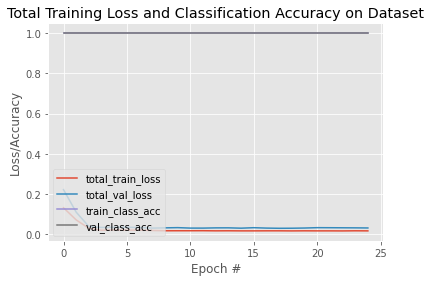

In [ ]:
import pickle
import matplotlib.pyplot as plt
print("[INFO] saving object detector model...")
torch.save(ObjectDetector, MODEL_PATH)
print("[INFO] saving label encoder...")
f = open(LE_PATH, "wb")
f.write(pickle.dumps(le))
f.close()
plt.style.use("ggplot")
plt.figure()
plt.plot(H["total_train_loss"], label="total_train_loss")
plt.plot(H["total_val_loss"], label="total_val_loss")
plt.plot(H["train_class_acc"], label="train_class_acc")
plt.plot(H["val_class_acc"], label="val_class_acc")
plt.title("Total Training Loss and Classification Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plotPath = os.path.sep.join([PLOTS_PATH, "training.png"])
plt.savefig(plotPath)

In [ ]:
from torchvision.transforms.transforms import RandomAdjustSharpness
from torchvision import transforms

print("[INFO] loading object detector...")
#model = torch.load(MODEL_PATH).to(Device)
#model.eval()
ObjectDetector.eval()
le = pickle.loads(open(LE_PATH, "rb").read())
transforms = transforms.Compose([
                                 transforms.ToPILImage(),
                                 transforms.Resize(900),
                                 transforms.RandomResizedCrop((200,200)),                                
                                 #transforms.RandomHorizontalFlip(0.5),
                                 #transforms.RandomRotation(degrees=180),
                                 transforms.RandomAdjustSharpness(0.5),
                                 #transforms.ColorJitter(brightness=0.9, contrast=1, saturation=0.7, hue=0),
                                 #transforms.RandomInvert(0.5),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean=Mean, std=Std)
])

"""
transforms = transforms.Compose([
                                 transforms.ToPILImage(),
                                 #ransforms.Resize(900),
                                 transforms.ToTensor(),
                                 transforms.CenterCrop((200,100)),
                                 transforms.RandomHorizontalFlip(0.9),
                                 transforms.RandomRotation(degrees=180),
                                 transforms.Grayscale(num_output_channels=1),
                                 transforms.GaussianBlur(kernel_size=501),
                                 transforms.RandomAdjustSharpness(sharpness_factor=10, p=0.5),
                                 transforms.RandomInvert(0.5),
                                 #transforms.functional.adjust_brightness(brightness_factor=2),
                                 #transforms.functional.adjust_contrast(contrast_factor=3.8),
                                 #transforms.functional.adjust_sharpness(sharpness_factor=10),
                                 transforms.ColorJitter(saturation=0.2),
                                 transforms.Normalize(mean=Mean, std=Std)
])
"""

[INFO] loading object detector...


'\ntransforms = transforms.Compose([\n                                 transforms.ToPILImage(),\n                                 #ransforms.Resize(900),\n                                 transforms.ToTensor(),\n                                 transforms.CenterCrop((200,100)),\n                                 transforms.RandomHorizontalFlip(0.9),\n                                 transforms.RandomRotation(degrees=180),\n                                 transforms.Grayscale(num_output_channels=1),\n                                 transforms.GaussianBlur(kernel_size=501),\n                                 transforms.RandomAdjustSharpness(sharpness_factor=10, p=0.5),\n                                 transforms.RandomInvert(0.5),\n                                 #transforms.functional.adjust_brightness(brightness_factor=2),\n                                 #transforms.functional.adjust_contrast(contrast_factor=3.8),\n                                 #transforms.functional.adjust_shar

In [ ]:
imagePath = "/content/raccoon_dataset/images/raccoon-10.jpg"
image = cv2.imread(imagePath)
orig = image.copy()
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image = image.transpose((2, 0, 1))
# convert image to PyTorch tensor, normalize it, flash it to the
# current device, and add a batch dimension
image = torch.from_numpy(image)
image = transforms(image).to(Device)
image = image.unsqueeze(0)

In [ ]:
(boxPreds, labelPreds) = ObjectDetector(image)
(startX, startY, endX, endY) = boxPreds[0]

labelPreds = torch.nn.Softmax(dim=-1)(labelPreds)
i = labelPreds.argmax(dim=-1).cpu()
label = le.inverse_transform(i)[0]
print(label)

raccoon


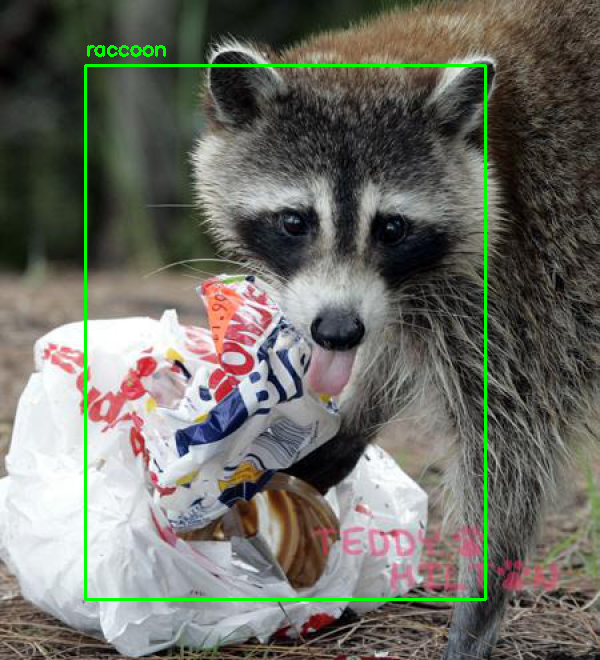

-1

In [ ]:
import imutils
from google.colab.patches import cv2_imshow
orig = imutils.resize(orig, width=600)
(h, w) = orig.shape[:2]
# scale the predicted bounding box coordinates based on the image
# dimensions
startX = int(startX * w)
startY = int(startY * h)
endX = int(endX * w)
endY = int(endY * h)
# draw the predicted bounding box and class label on the image
y = startY - 10 if startY - 10 > 10 else startY + 10
cv2.putText(orig, label,(startX, y), cv2.FONT_HERSHEY_SIMPLEX,0.65, (0, 255, 0), 2)
cv2.rectangle(orig, (startX, startY), (endX, endY),(0, 255, 0), 2)
# show the output image 
cv2_imshow(orig)
cv2.waitKey(0)

In [ ]:
print(startX, startY, endX, endY)

85 65 485 599


[]

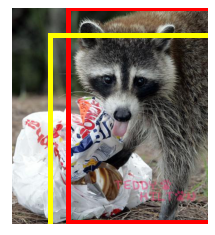

In [ ]:
import imageio
import matplotlib.pyplot
import matplotlib.patches
#gt_box = [1, 24, 517, 423]
#pred_box = [96, 53, 475, 358]
def intersection_over_union(gt_box, pred_box):
    inter_box_top_left = [max(gt_box[0], pred_box[0]), max(gt_box[1], pred_box[1])]
    inter_box_bottom_right = [min(gt_box[0]+gt_box[2], pred_box[0]+pred_box[2]), min(gt_box[1]+gt_box[3], pred_box[1]+pred_box[3])]

    inter_box_w = inter_box_bottom_right[0] - inter_box_top_left[0]
    inter_box_h = inter_box_bottom_right[1] - inter_box_top_left[1]

    intersection = inter_box_w * inter_box_h
    union = gt_box[2] * gt_box[3] + pred_box[2] * pred_box[3] - intersection
    
    iou = intersection / union

    return iou, intersection, union

im = imageio.imread("/content/raccoon_dataset/images/raccoon-10.jpg")

gt_box = [130, 2, 446, 488]
pred_box = [90, 64, 473, 589]

fig, ax = matplotlib.pyplot.subplots(1)
ax.imshow(im)

gt_rect = matplotlib.patches.Rectangle((gt_box[0], gt_box[1]),
                                       gt_box[2],
                                       gt_box[3],
                                       linewidth=5,
                                       edgecolor='r',
                                       facecolor='none')

pred_rect = matplotlib.patches.Rectangle((pred_box[0], pred_box[1]),
                                         pred_box[2],
                                         pred_box[3],
                                         linewidth=5,
                                         edgecolor=(1, 1, 0),
                                         facecolor='none')
ax.add_patch(gt_rect)
ax.add_patch(pred_rect)

ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

In [ ]:
iou, intersect, union = intersection_over_union(gt_box, pred_box)
print(iou, intersect, union)
 

0.5916154297645508 184458 311787


In [ ]:
IOU = []
Gbox = []
Pbox = []
#model = torch.load(MODEL_PATH).to(Device)
#model.eval()
ObjectDetector.eval()
filenames = [img for img in glob.glob(Image_Path + '**/*.jpg')]
filenames.sort()

for img_name in filenames:
  #print(img_name)
  image = cv2.imread(img_name)
  orig = image.copy()
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (224, 224))
  image = image.transpose((2, 0, 1))
  image = torch.from_numpy(image)
  image = transforms(image).to(Device)
  image = image.unsqueeze(0)
  (boxPreds, labelPreds) = ObjectDetector(image)
  (startX, startY, endX, endY) = boxPreds[0]
  orig = imutils.resize(orig, width=600)
  (h, w) = orig.shape[:2]
  startX = int(startX * w)
  startY = int(startY * h)
  endX = int(endX * w)
  endY = int(endY * h)

  pbox=[startX, startY, endX, endY]
  Pbox.append(pbox)
  #print(pbox)
with open('raccoon_labels.csv', 'r') as fp:
  lines = fp.readlines()
for i, line in enumerate(lines):
  if(i==0):
    continue
  row = line.split(",")
  #print(row)
  (filename,width,height,label,xmin,ymin,xmax,ymax) = row
  xmin = float(xmin)
  ymin = float(ymin)
  xmax = float(xmax)
  ymax = float(ymax)
  gbox=[xmin, ymin, xmax, ymax]
  Gbox.append(gbox)
  #print(gbox)
  #iou, intersect, union = intersection_over_union(gbox, pbox)
  #print(iou)
  #IOU.append(iou)
print(len(Pbox))
print(len(Gbox))
for i in range(200):
   #print(Gbox[i])
   #print(Pbox[i])
   iou, intersect, union = intersection_over_union(Gbox[i], Pbox[i])
   #print(iou)
   IOU.append(iou)
print(IOU)



200
200
[0.6040085171388216, 0.5802984037139098, 0.011929179931797304, 0.7502794737294695, 0.01407264163587279, 0.6540699255070415, 0.7041806550750781, 0.3208798170073923, 0.1256827127594553, 0.5885096330088387, 0.7587520775133492, 0.04727492497068562, 0.505894980820465, 0.03655587036141248, 0.5133200598424744, 0.22323833275350535, 0.47570112423393807, 0.37141206612955147, 0.4118579331797689, 0.5125960919046596, 0.43499829881575625, 0.5029324658364815, 0.24606049942550337, 0.03642023967511151, 0.7452162365032623, 0.6875796244857041, 0.024119569624620016, 0.34286506685350615, 0.110111025698411, 0.11622147532283743, 0.09314215951753702, 0.16960740105022765, 0.12734891078949057, 0.8405320159604788, 0.48059731380429965, 0.4820406699975948, 0.06366559485530547, 0.04541904722758847, 0.5263751682815374, 0.12162828916860502, 0.6854755805035654, 0.11584691536882771, 0.2523648793399761, 0.14343200924339616, 0.06262897383725125, 0.3652003411948466, 0.048272305312016504, 0.031205673758865248, 0.17

In [ ]:
len(IOU)

200

In [ ]:
for i in range(len(IOU)): 
  if IOU[i] > 0.5:
    IOU[i] = 'Positive'
  else:
    IOU[i] = 'Negative'
print(IOU)

['Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Ne

In [ ]:
positives = 0
negatives = 0
p = 'Positive'
n = 'Negative'
for i in range(len(IOU)):
  if IOU[i] == p:
      positives += 1
  else:
    negatives += 1
print(positives)
print(negatives)

60
140


In [ ]:
a = (positives/len(IOU))*100
b = (negatives/len(IOU))*100
print("%s%%"%a)
print("%s%%"%b)

30.0%
70.0%


In [ ]:
numerator = positives
denominator = positives + negatives
Map = numerator / denominator
print(Map)

0.3
